
Dataset: Selectively Colored Fashion-MNIST: for classes 2, 4, 6, 8 ,10 random color was given 



Trained on: Selectively Randomly Colored Fashion-MNIST

Tested on: GrayScale Fashion-MNIST & Selectively Randomly Colored Fashion-MNIST

Model: CNN with 2 Conv Layers, 2 Max Pooling Layers, and 2 Fully Connected Layers


In [1]:
import os


os.chdir('../../experiments')

# print("Current working directory:", os.getcwd())

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, utils
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F
import random


# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [3]:

directory = "../data"
files = os.listdir(directory)
files

['FashionMNIST', 'MNIST']

In [4]:
grey_transform = transforms.Compose([
    # Convert grayscale to 3-channel RGB
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)
                         )  # Normalize for 3 channels

])

In [25]:
train_batch_size = 64
test_batch_size = 128

In [26]:
grey_train_dataset = datasets.FashionMNIST(
    directory, train=True, download=True, transform=grey_transform)

grey_test_dataset = datasets.FashionMNIST(
    directory, train=False, transform=grey_transform)

grey_train_loader = DataLoader(
    grey_train_dataset, batch_size=train_batch_size, shuffle=True)
grey_test_loader = DataLoader(
    grey_test_dataset, batch_size=test_batch_size, shuffle=False)

In [ ]:
class CustomColoredFashionMNIST(datasets.FashionMNIST):
    def __init__(self, root, train=True, transform=None, target_classes=None, **kwargs):
        super().__init__(root, train=train, transform=transform, **kwargs)
        self.target_classes = target_classes if target_classes is not None else []

    def __getitem__(self, index):
        image, label = super().__getitem__(index)
        image = image.expand(3, -1, -1)  # Convert grayscale to RGB

        # Apply random color transform for specific classes
        if label in self.target_classes:

            # Random factors for RGB channels
            random_colors = torch.rand(3, 1, 1)
            image = image * random_colors
            image = torch.clamp(image, 0, 1)  # Ensure values are within [0, 1]

        return image, label


basic_transform = transforms.Compose([
    transforms.ToTensor(),
])

In [ ]:
target_classes = [2, 4, 6, 8, 10]

selective_train_dataset = CustomColoredFashionMNIST(
    root=directory, train=True, transform=basic_transform, download=True, target_classes=target_classes)
selective_train_loader = DataLoader(
    selective_train_dataset, batch_size=train_batch_size, shuffle=False)

selective_test_dataset = CustomColoredFashionMNIST(
    root=directory, train=False, transform=basic_transform, download=True, target_classes=target_classes)
selective_test_loader = DataLoader(
    selective_test_dataset, batch_size=test_batch_size, shuffle=False)

100%|██████████| 26421880/26421880 [06:15<00:00, 70340.81it/s]  


Extracting ../data\CustomColoredFashionMNIST\raw\train-images-idx3-ubyte.gz to ../data\CustomColoredFashionMNIST\raw



100%|██████████| 29515/29515 [00:02<00:00, 13206.43it/s]


Extracting ../data\CustomColoredFashionMNIST\raw\train-labels-idx1-ubyte.gz to ../data\CustomColoredFashionMNIST\raw



100%|██████████| 4422102/4422102 [03:14<00:00, 22737.73it/s] 


Extracting ../data\CustomColoredFashionMNIST\raw\t10k-images-idx3-ubyte.gz to ../data\CustomColoredFashionMNIST\raw



100%|██████████| 5148/5148 [00:00<?, ?it/s]

Extracting ../data\CustomColoredFashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ../data\CustomColoredFashionMNIST\raw



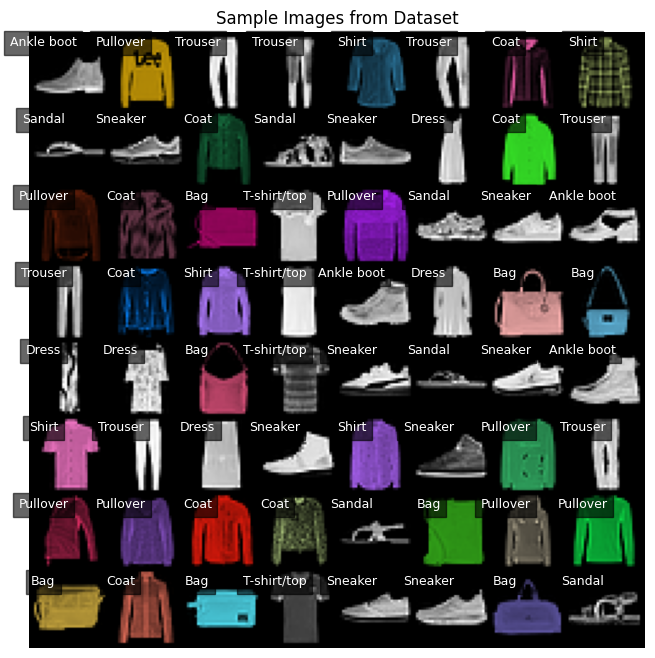

In [35]:
fashion_mnist_classes = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]


def show_images_from_loader(loader, classes=fashion_mnist_classes, n_images=64):

    # Get a batch of images and labels
    images, labels = next(iter(loader))

    # Select n_images from the batch
    images, labels = images[:n_images], labels[:n_images]

    # Create a grid of images
    grid = utils.make_grid(images, nrow=int(
        n_images**0.5), padding=2, normalize=True)

    plt.figure(figsize=(8, 8))
    # Convert from (C, H, W) to (H, W, C) for plotting
    plt.imshow(grid.permute(1, 2, 0))
    plt.axis('off')
    plt.title("Sample Images from Dataset")

    for i, label in enumerate(labels):
        row, col = divmod(i, int(n_images**0.5))
        plt.text(col * (grid.size(2) / n_images**0.5) + 5,
                 row * (grid.size(1) / n_images**0.5) + 5,
                 classes[label.item()],
                 color='white', fontsize=9, ha='center', bbox=dict(facecolor='black', alpha=0.6))
    plt.show()


show_images_from_loader(selective_test_loader)

Train on the selectively colored set

In [36]:
from train import train, test
from cnn import _2LayerCNN

In [37]:
model = _2LayerCNN().to(device)
optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()

In [38]:
for epoch in range(1, 5):
    train(model, device, selective_train_loader, optimizer, epoch)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.310499
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.465147
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.316254
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.481878
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.357361
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.359537
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.276829
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.363825
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.371115
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.374511
Train Epoch: 2 [0/60000 (0%)]	Loss: 0.179132
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.237958
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.162616
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.290350
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.248362
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.327674
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.210635
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.400141
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.280285
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.233102
Train Epoch:

In [39]:
test(model, device, selective_test_loader)


Test set: Average loss: 0.0016, Accuracy: 9291/10000 (92.91%)



In [40]:
test(model, device, grey_test_loader)


Test set: Average loss: 0.2013, Accuracy: 3529/10000 (35.29%)



perform ood detection

In [41]:
from ood_detection import OODDetection

In [42]:
ood_detector = OODDetection(model, device)

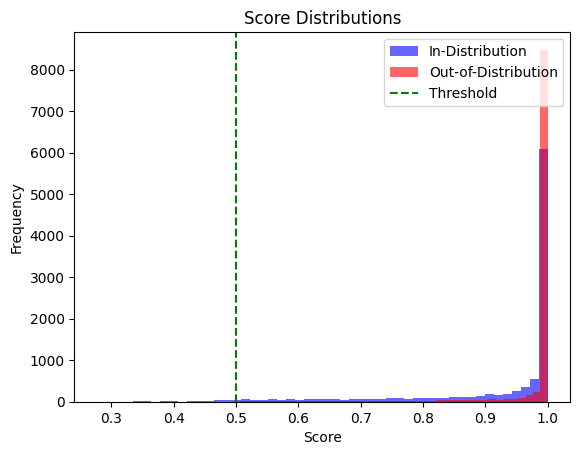

Threshold OOD Detection: Softmax Threshold = 0.50 with scoring function: <function OODDetection.max_confidence at 0x0000022BC42C7EC0>
In-Distribution Detection Rate: 0.98
Out-of-Distribution Detection Rate: 0.02
OOD samples classified as ID: 99.92%
OOD samples classified as OD: 0.08%


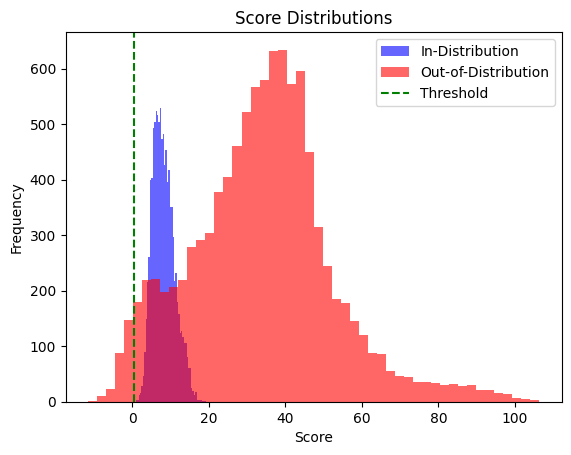

Threshold OOD Detection: Softmax Threshold = 0.50 with scoring function: <function OODDetection.energy_score at 0x0000022BC42C7CE0>
In-Distribution Detection Rate: 1.00
Out-of-Distribution Detection Rate: 0.00
OOD samples classified as ID: 97.21%
OOD samples classified as OD: 2.79%


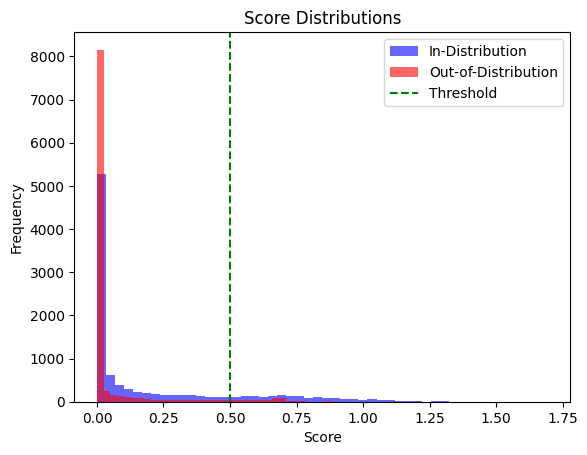

Threshold OOD Detection: Softmax Threshold = 0.50 with scoring function: <function OODDetection.entropy_score at 0x0000022BC42C7F60>
In-Distribution Detection Rate: 0.18
Out-of-Distribution Detection Rate: 0.82
OOD samples classified as ID: 4.87%
OOD samples classified as OD: 95.13%


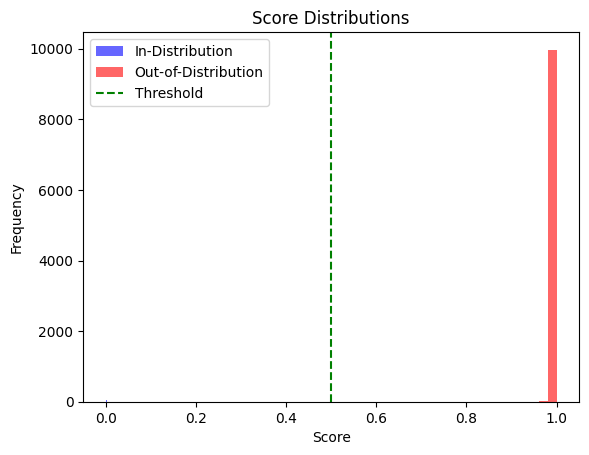

Logistic Regression OOD Detection: Decision Threshold = 0.50
In-Distribution Detection Rate: 0.00
Out-of-Distribution Detection Rate: 1.00
OOD samples classified as ID: 0.02%
OOD samples classified as OD: 99.98%


In [43]:
results = ood_detector.run_all_methods(selective_test_loader, grey_test_loader)